## 머신러닝
# 군집 (Clustering)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

### k-means 알고리즘

In [5]:
# setosa 와 versicolor 를 추출, 속성은 2개
X = iris.data[:100, :2]
y = iris.target[:100]
X.shape, y.shape

((100, 2), (100,))

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

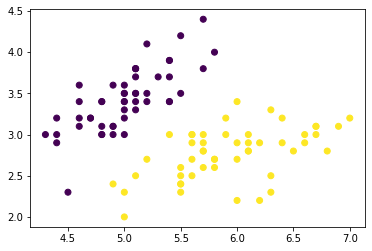

In [6]:
plt.scatter(X[:,0], X[:,1], c=y)

In [8]:
from sklearn.cluster import KMeans

In [9]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` o

In [11]:
model = KMeans(n_clusters=2)
model.fit(X) # 입력값 X 만 사용함!

KMeans(n_clusters=2)

In [12]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [13]:
model.cluster_centers_

array([[5.01636364, 3.35090909],
       [6.02666667, 2.79111111]])

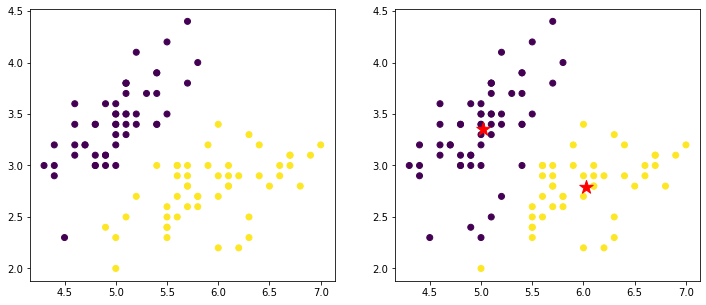

In [16]:
plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y)

plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=model.labels_)
cc = model.cluster_centers_
plt.scatter(cc[:,0], cc[:,1], c='r', s=200, marker='*')

### 정규화 적용
- k-means 에서 정규화 적용은 필수이다

In [19]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
X_norm.shape

(100, 2)

In [20]:
model = KMeans(n_clusters=2)
model.fit(X_norm)

KMeans(n_clusters=2)

In [21]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
model.cluster_centers_

array([[ 0.68419044, -0.71003124],
       [-0.71211658,  0.7390121 ]])

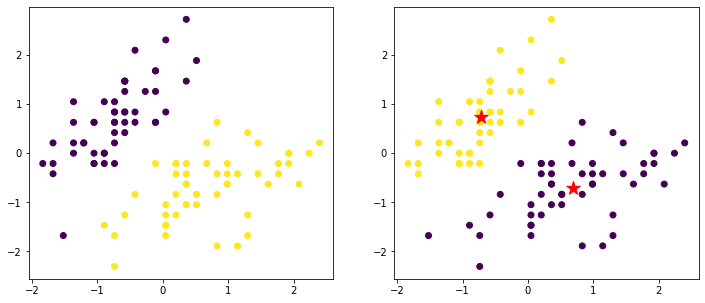

In [23]:
plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.scatter(X_norm[:,0], X_norm[:,1], c=y)

plt.subplot(1,2,2)
plt.scatter(X_norm[:,0], X_norm[:,1], c=model.labels_)
cc = model.cluster_centers_
plt.scatter(cc[:,0], cc[:,1], c='r', s=200, marker='*')

### 전체 속성 사용

In [29]:
X = iris.data[:100] # 속성 4개 사용
X = (X - X.mean(axis=0)) / X.std(axis=0) # 정규화
y = iris.target[:100]
X.shape, y.shape

((100, 4), (100,))

In [30]:
model = KMeans(n_clusters=2)
model.fit(X)

KMeans(n_clusters=2)

In [31]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
model.cluster_centers_

array([[-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 0.50728948, -0.42663134,  0.65249366,  0.62744675]])

### 속성 변환 (transform)
- 클러스터 중심에서의 거리로 변환

In [33]:
X2 = model.transform(X)
X2.shape

(100, 2)

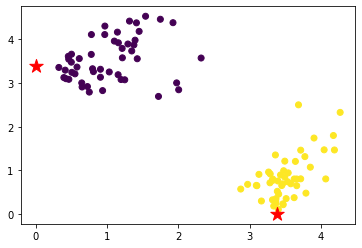

In [35]:
plt.scatter(X2[:,0], X2[:,1], c=model.labels_)
cc = model.transform(model.cluster_centers_)
plt.scatter(cc[:,0], cc[:,1], c='r', s=200, marker='*')

### DBSCAN
- DBSCAN 은 반지름과 샘플갯수가 주어지면 그 반지름 안에 해당 샘플갯수만큼 있는 이웃을 확장해 나가는 군집 알고리즘이다.
- 아래 그림은 샘플갯수가 4개, 반지름이 $\epsilon$ 인 경우이다. 빨간 점은 **핵심샘플**, 노란 점은 **경계샘플**, N은 **잡음샘플** 이다.

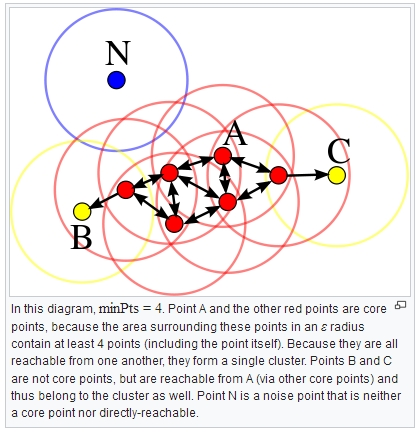

(100, 2)

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

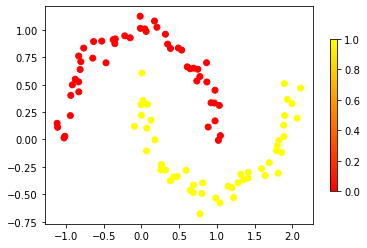

In [36]:
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.07, random_state=1)
display(X.shape, y)

plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.colorbar(shrink=0.7)

In [38]:
from sklearn.cluster import DBSCAN

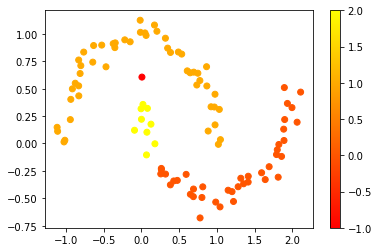

In [39]:
dbscan = DBSCAN(min_samples=2, eps=0.2)
dbscan.fit(X)

plt.scatter(X[:,0], X[:,1], c=dbscan.labels_, cmap='autumn')
plt.colorbar()

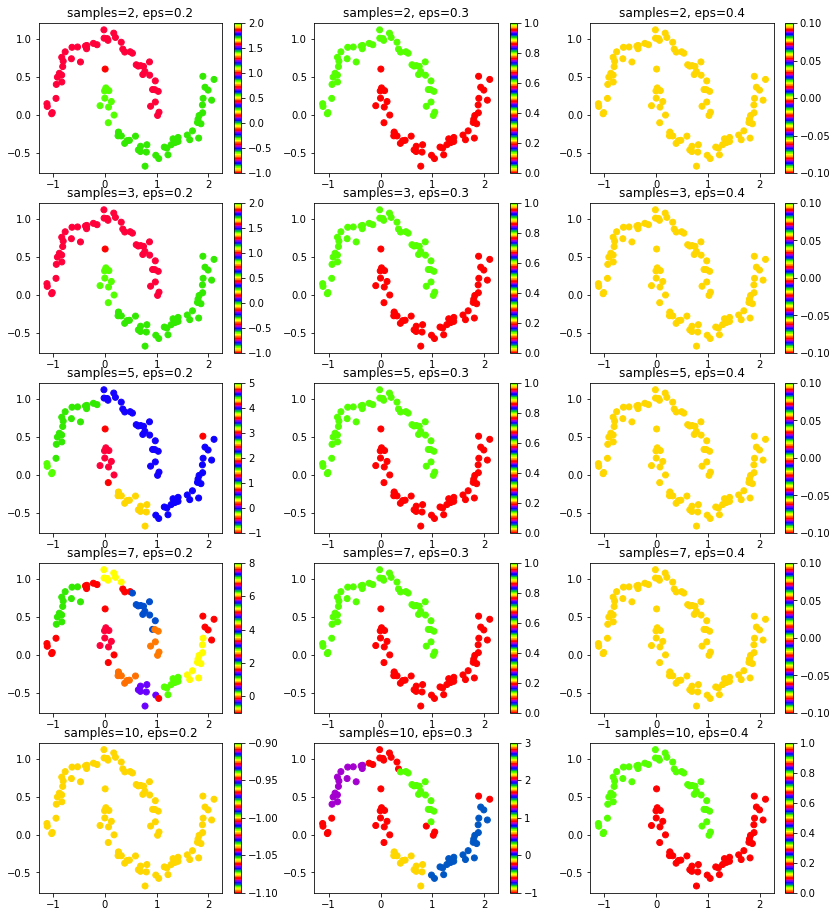

In [40]:
n=1
plt.figure(figsize=[14,16])

for samples in [2,3,5,7,10]:
    for eps in [0.2, 0.3, 0.4]:
        dbscan = DBSCAN(min_samples=samples, eps=eps)
        label = dbscan.fit_predict(X)
        
        plt.subplot(5,3,n); n+=1
        plt.title('samples=%d, eps=%.1f' % (samples,eps))
        plt.scatter(X[:,0], X[:,1], c=label, cmap='prism')
        plt.colorbar()